CNN Architecture for the model 
- DATASET - data_1_0002.json
- seg - 1
- duration = 5

each - around 350 data 

In [7]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [9]:
DATASET_PATH="data_1_0002.json"

# load data from json
with open(DATASET_PATH, "r") as fp:
    data = json.load(fp)

# convert lists into numpy arrays 
x = np.array(data["mfcc"])
y = np.array(data["labels"])

In [10]:
# create train, validation and test sets
TEST_SIZE=0.25
VAL_SIZE=0.2 

# create train/test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE)
    
# create train/val split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=VAL_SIZE)

# 3d array -> 4d array ( , , , 1 )
x_train = x_train[..., np.newaxis] # 4d -> (num_samples, 130, 13, 1) 
x_val = x_val[..., np.newaxis] 
x_test = x_test[..., np.newaxis] 

y_train, y_test,  y_val

(array([0, 1, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0,
        2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 1, 2,
        1, 2, 1, 0, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 0,
        0, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 2,
        0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1,
        1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 1, 1, 2,
        0, 2, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0,
        1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2,
        1, 2, 0, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
        1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0,
        0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 

In [4]:
# input shape
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])
input_shape

(216, 13, 1)

In [178]:
# Build CNN network
model = keras.Sequential()
model.add(keras.layers.Input(shape=input_shape))

# 1st con layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu')) 
model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same')) 
model.add(keras.layers.BatchNormalization())

# 2nd con layer
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D((3,3), strides=(2,2), padding='same'))
model.add(keras.layers.BatchNormalization())

# 3rd con layer
model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
model.add(keras.layers.MaxPool2D((2,2), strides=(2,2), padding='same'))
model.add(keras.layers.BatchNormalization())


# Flatten the output and feed it into dense layer
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# output layer
model.add(keras.layers.Dense(3, activation='softmax'))

In [180]:
# compile the network
# compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
             )

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_41 (Conv2D)                   │ (None, 214, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 107, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_41               │ (None, 107, 6, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_42 (Conv2D)                   │ (None, 105, 4, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 53, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_42               │ (None, 53, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 52, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 26, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_43               │ (None, 26, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 832)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │         106,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,155 (504.51 KB)

 Trainable params: 128,963 (503.76 KB)

 Non-trainable params: 192 (768.00 B)

In [182]:
# train the CNN 
history = model.fit(
    x_train, 
    y_train,  
    validation_data=(x_val, y_val),
    epochs=100,
    batch_size=64
)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.2651 - loss: 2.1881 - val_accuracy: 0.3471 - val_loss: 2.2580
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.4162 - loss: 1.5023 - val_accuracy: 0.3719 - val_loss: 1.5487
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.5031 - loss: 1.1397 - val_accuracy: 0.3884 - val_loss: 1.2560
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.6109 - loss: 1.0067 - val_accuracy: 0.4215 - val_loss: 1.1036
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6682 - loss: 0.9042 - val_accuracy: 0.4793 - val_loss: 1.0139
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6722 - loss: 0.7779 - val_accuracy: 0.5289 - val_loss: 0.9473
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7175 - loss: 0.8103 - val_accuracy: 0.5950 - val_loss: 0.8909
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.6937 - loss: 0.7229 - val_accuracy: 0.5950 - val_loss

In [184]:
# evaluate the CNN on the test_set
test_error, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Accuracy on test set is: {test_accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8628 - loss: 0.2635
Accuracy on test set is: 0.8557214140892029


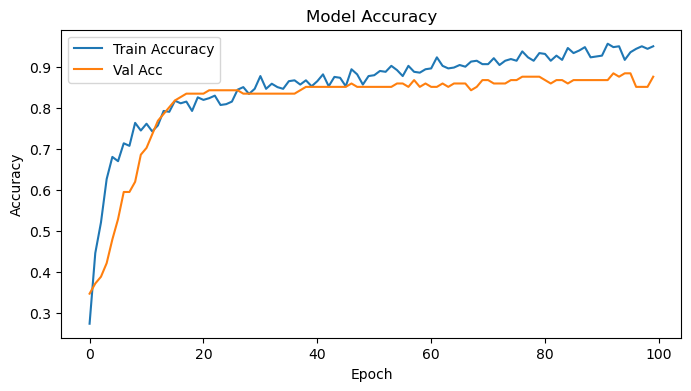

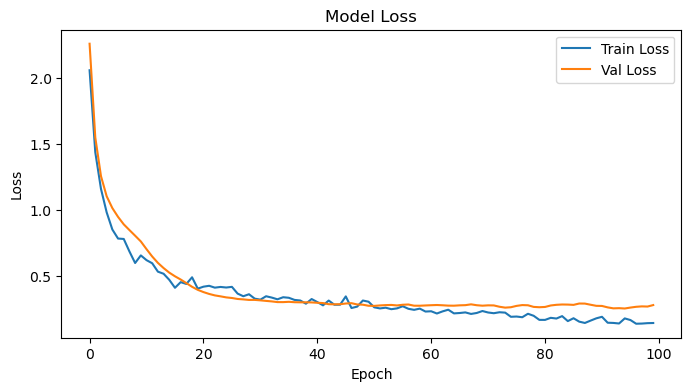

In [186]:
# Plot Training History for Accuracy
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot Training History for Loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [188]:
# make predictions on a sample test data
X = x_test[2]
Y = y_test[2]

X = X[np.newaxis, ...]
prediction = model.predict(X)

# extract index with max value
predicted_index = np.argmax(prediction, axis=1) 

print(f"Expected index: {Y}, \nPredicted Index: {predicted_index[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Expected index: 2, 
Predicted Index: 2


classification report

In [190]:
# Classification Report
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1) 
y_true_classes = y_test

# Define your class names
class_names = ['abnormal', 'artifact', 'normal']

# Get report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print(report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

    abnormal       0.91      0.71      0.80        75
    artifact       0.99      0.99      0.99        86
      normal       0.60      0.85      0.70        40

    accuracy                           0.86       201
   macro avg       0.83      0.85      0.83       201
weighted avg       0.88      0.86      0.86       201



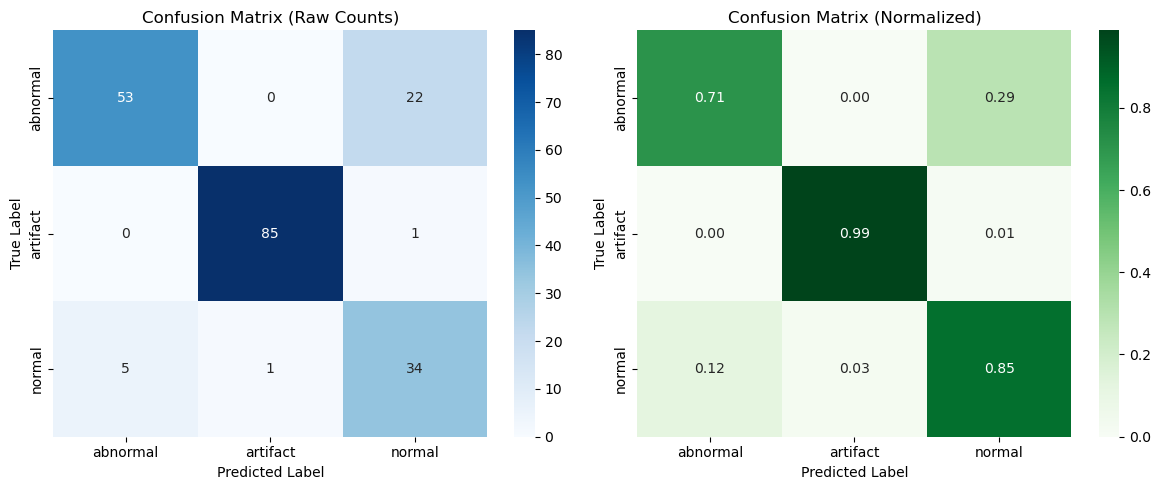

In [192]:
# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Class names
class_names = ['abnormal', 'artifact', 'normal']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Raw Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names, ax=axes[0])
axes[0].set_title('Confusion Matrix (Raw Counts)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot 2: Normalized Confusion Matrix
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names, ax=axes[1])
axes[1].set_title('Confusion Matrix (Normalized)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [194]:
# as a keras model
model.save('models/heart_sound_model1_v3_0005_D5s.keras')
# as a h5 model
model.save("models/heart_sound_model1_v3_0005_D5s.h5")